<a href="https://colab.research.google.com/github/SondipPoulSingh/Machine-Learning/blob/main/Accuracy%2C_Precision%2C_Recall%2C_F1_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.shape) #(768,9)
print(df.isnull().sum())

In [10]:
X = df.loc[:,'Pregnancies':'Age']
y = df.loc[:,'Outcome']

In [11]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=83)

In [62]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [66]:
lr = LogisticRegression(max_iter=1000) # https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
rf = RandomForestClassifier()
sv = SVC()

In [67]:
from sklearn.metrics import accuracy_score

In [69]:
classifier=[lr,rf,sv]
names=['lr','rf','svm']
predictions={}
accuracy={}
i=0
for clf in classifier:
  clf.fit(X_train, y_train)
  predictions[names[i]]=clf.predict(X_test)
  accuracy[names[i]]=accuracy_score(y_test,predictions[names[i]])
  i+=1

In [97]:
print(predictions)
print(accuracy)

{'lr': array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]), 'rf': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [73]:
# as now we have the predictions we can find the confusion matrix.
# confusion matrix shows which classification results the accuracy.
# We can find the accuracy easily from the confusion matrix.

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [95]:
for clf in predictions:
  print(f'{clf}: \n {confusion_matrix(y_test,predictions[clf])}','\n')
  print(f'Precision: {precision_score(y_test,predictions[clf])}','\n')
  print(f'Recall: {recall_score(y_test,predictions[clf])}','\n')
  print(f'F1 Score: {f1_score(y_test,predictions[clf])}','\n')

lr: 
 [[92  7]
 [20 35]] 

Precision: 0.8333333333333334 

Recall: 0.6363636363636364 

F1 Score: 0.7216494845360825 

rf: 
 [[86 13]
 [24 31]] 

Precision: 0.7045454545454546 

Recall: 0.5636363636363636 

F1 Score: 0.6262626262626263 

svm: 
 [[90  9]
 [23 32]] 

Precision: 0.7804878048780488 

Recall: 0.5818181818181818 

F1 Score: 0.6666666666666666 



True positive and True Negatives are the classes that are correctly classified. <br>
False positive means the model finds them positive but 
they are actually negative.<br> 
False negative means model finds them negative but they are actually positive.

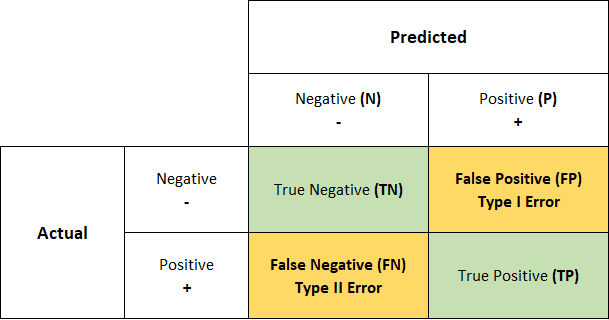

precision -> the proportion of predicted positive is actually positive<br>
recall -> the proportion of of positives is correctly classified<br><br>
precision and recall is important when models holds the same accuracy. <br><br>
Depending on the requirement we want high recall or high precision.<br><br>
F1 score finds the harmonic mean of precision and recall. It have a lower
value when either precision or recall have low value. In a good model the 
F1 score is always high.

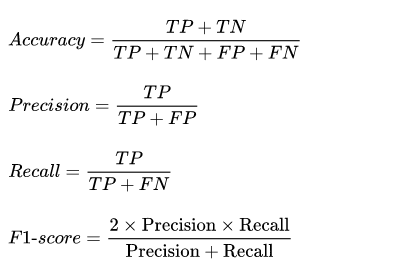

In [99]:
# a shortcut
from sklearn.metrics import classification_report
for clf in predictions:
  print(f'{clf}: \n {classification_report(y_test,predictions[clf])}','\n')

lr: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        99
           1       0.83      0.64      0.72        55

    accuracy                           0.82       154
   macro avg       0.83      0.78      0.80       154
weighted avg       0.83      0.82      0.82       154
 

rf: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154
 

svm: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.78      0.58      0.67        55

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       1

In [100]:
# for multiclass classification precision,recall, and f1 score is calculate individually.
# macro average finds the direct mean of precision,and recall.
# as example for svm macro precision=(0.80+0.78)/2
# Weighted avg are calculated using weighted mean values. weight=diabetes/have diabetes +have_no_diabetes
# use macro when dataset is balanced, for imbalanced dataset use weighted avg.
# Here support means how many data we have for any particular class.

### Iris_dataset_Example

In [101]:
from sklearn import datasets 

In [103]:
iris = datasets.load_iris()
X = iris.data
y = iris.target #0,1,2

In [109]:
print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [116]:
iris['feature_names'], iris['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=83)

In [117]:
sv = SVC()

In [118]:
sv.fit(X_train, y_train)

SVC()

In [119]:
y_pred = sv.predict(X_test)

In [120]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  3,  8]])

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      1.00      0.84         8
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.89        30
weighted avg       0.93      0.90      0.90        30

